In [9]:
import yaml
import praw

In [19]:
with open('backup/reddit-api-data.yml', 'r') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

In [20]:
reddit = praw.Reddit(
    user_agent="Comment Extraction (by u/USERNAME)",
    client_id=config['id'],
    client_secret=config['secret'],
    username=config['username'],
    password=config['password'],
)

In [1]:
import pandas as pd

def get_comments(post_id, top=False):
    submission = reddit.submission(id=post_id)
    comments_data = []
    
    submission.comments.replace_more(limit=None)
    sub = submission.comments if top else submission.comments.list()
    for comment in sub:
        data = [pd.to_datetime(comment.created_utc, unit='s'), comment.author, comment.body, comment.score]
        if top:
            data.append(len(comment.replies))
            data.append(len(comment.replies.list()))
        comments_data.append(data)
    
    if top:
        comments_df = pd.DataFrame(comments_data, columns=['date', 'author', 'body', 'score', 'replies', 'comms'])
    else:
        comments_df = pd.DataFrame(comments_data, columns=['date', 'author', 'body', 'score'])
    
    return comments_df.set_index('date').sort_index()

In [2]:
df = pd.read_csv("data/wsb_processed.csv", index_col=0)

In [3]:
df

,is_self,title_length,title_capital,body_length,body_urls,body_punct,deleted,b0,b1,b2,...,0,1,3,col0,col1,col2,col3,col4,col5,col7
id,,,,,,,,,,,,,,,,,,,,,
l69fvk,True,18,0.068966,29.0,0,1,False,1,0,1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
l87ci6,False,9,0.117647,0.0,0,0,False,0,0,0,...,-11.368509,-34.681310,-14.813305,0.5,0.000000,0.363636,0.500000,0.444444,0.354701,0.354545
lc8dnh,True,5,0.058824,155.0,0,1,False,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
l71knz,True,11,0.941176,110.0,0,1,False,1,1,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
l70720,True,8,1.000000,41.0,0,1,False,1,0,1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l6b99w,True,20,0.033333,37.0,0,1,False,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
l6zb4b,False,29,0.583333,0.0,0,0,False,0,0,0,...,-16.384602,-29.250435,-4.414461,0.5,0.533333,0.500000,0.583333,0.424883,0.421958,0.997312
l70tgo,True,16,0.104167,18.0,0,1,False,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
df['comms_num'].describe()

count    38908.000000
mean       163.334456
std       2618.259934
min          0.000000
25%          2.000000
50%          7.000000
75%         23.000000
max      97996.000000
Name: comms_num, dtype: float64

In [24]:
from tqdm.notebook import tqdm

def get_posts(df, n=100, top=False):
    posts = df[(df['comms_num'] > 50) & (df['comms_num'] < 10000)].sample(n)
    pdict = {}
    for i in tqdm(posts.index):
        comm_df = get_comments(i, top)
        pdict[i] = get_comments(i, top)
        
    return pdict

In [28]:
import pickle

comms = get_posts(df, 100)

with open('backup/comments.pickle', 'wb') as handle:
    pickle.dump(comms, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
import pickle

with open('backup/comments.pickle', 'rb') as handle:
    comms_ = pickle.load(handle)

In [6]:
comms_.keys()

dict_keys(['lbs0h2', 'l7q26x', 'l7otwv', 'l77bl1', 'lb3cn9', 'lg8b7a', 'lfv9ah', 'l9ldib', 'l6novm', 'l79zmy', 'l59u37', 'l1hw75', 'l9gqbf', 'lbo9ud', 'l24457', 'l78duc', 'la1m8w', 'la6ouz', 'labcje', 'lb0595', 'l77wt7', 'lg9ktu', 'la631h', 'lcjf5w', 'l6vngb', 'l77wpb', 'l70hc4', 'l80pt5', 'l69q9u', 'l73brc', 'l9li04', 'l7gnla', 'l8or77', 'lbl1vr', 'l83mn8', 'l77may', 'la5k7e', 'l7vkj8', 'l7mep6', 'l9n5j0', 'l9l78h', 'l7uvcg', 'l1qtmg', 'l8oinu', 'lan2qs', 'laz2d2', 'lcjac3', 'la1nvq', 'l7x4b0', 'l95k8j', 'la9ym6', 'l3etpg', 'la8oc8', 'l4xcij', 'lg3zf4', 'l90d0f', 'lau7z0', 'l9jgw1', 'l1zqvz', 'l7uw0g', 'l121r4', 'l9vx4t', 'l6gxkm', 'l8mzbx', 'latzst', 'l80pli', 'l6x5b8', 'l7u27v', 'l4ww5c', 'l2gbae', 'las5ys', 'l7rdlq', 'l9o35x', 'lc6xn8', 'lbm1ks', 'l833dg', 'l9aueq', 'lb7jtd', 'lbi8y6', 'lac2b8', 'lal1g7', 'l4cv1c', 'la6nzb', 'ladphl', 'lbujvi', 'l6pw3w', 'l665ot', 'la4wz8', 'la9krl', 'l70xjl', 'labfsr', 'l81cb2', 'lbwco7', 'l6mib8', 'lh173n', 'lb0cg3', 'lbd21v', 'l1zl9r', 'layxmy',

In [7]:
test = comms_['l833dg'].reset_index().reset_index()
test['index'] += 1
test

,index,date,author,body,score
0,1,2021-01-29 20:23:42,0toHeroInvesting,**\~Tl;dr\~ Buy AMD especially under $86 and e...,80
1,2,2021-01-29 20:23:45,tatey15,intruder,-2
2,3,2021-01-29 20:23:51,Darkgold44333,SHORT LADDER ATTACK INCOMING HOLD HOLD HOLD UP...,12
3,4,2021-01-29 20:23:52,ambitiontowin56,y’all gotta save these posts for next week 😂,225
4,5,2021-01-29 20:24:27,raidz817,Positions or ban.,18
...,...,...,...,...,...
247,248,2021-02-09 02:35:24,Hopai79,10 days later and the stock is still bagging. ...,2
248,249,2021-02-13 00:09:28,millionreddit617,"I like your funny words, magic man.",3
249,250,2021-02-13 08:04:42,0toHeroInvesting,Nice!,1
250,251,2021-05-10 09:47:05,stocklistglobal,Heres why amd is a steal https://youtu.be/6tyJ...,1


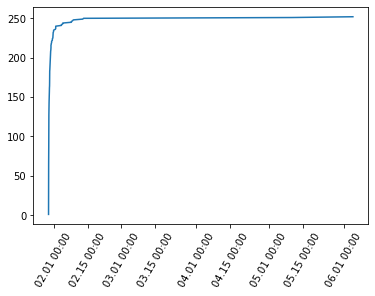

In [8]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


fig, ax = plt.subplots()
ax.plot(test['date'], test['index'])
plt.xticks(rotation=60)

myFmt = DateFormatter("%m.%d %H:%M")
ax.xaxis.set_major_formatter(myFmt)

# Aggregate

In [9]:
test = comms_['l833dg']

agg_text = test['body'].groupby(pd.Grouper(freq='30Min')).apply(lambda x: ','.join(x))
agg_ncomms = test.reset_index().reset_index().set_index('date')
agg_ncomms['index'] += 1
agg_ncomms = agg_ncomms.groupby(pd.Grouper(freq='30Min')).count()['index']

In [10]:
agg_post = pd.concat([agg_text, agg_ncomms], axis=1)

In [11]:
agg_post

,body,index
date,,
2021-01-29 20:00:00,**\~Tl;dr\~ Buy AMD especially under $86 and e...,32
2021-01-29 20:30:00,I like this stock. Bought some today 4 @ $86 t...,24
2021-01-29 21:00:00,"Will buy after pulling out of BB,Nah but it do...",9
2021-01-29 21:30:00,Repost this next week tard. To pluto we will ...,6
2021-01-29 22:00:00,"I'll buy in next week for sure!,I definitely g...",21
...,...,...
2021-06-04 16:00:00,,0
2021-06-04 16:30:00,,0
2021-06-04 17:00:00,,0


In [12]:
df.columns[50:100]

Index(['b51', 'b52', 'b53', 'b54', 'b55', 'b60', 'b61', 'b63', 'b64', 'b66',
       'b68', 'b70', 'b83', 'b88', 't0', 't1', 't2', 't3', 't5', 't6', 't7',
       't9', 't10', 't12', 't13', 'col6', '2', '6', '12', 'i6', 'i12', 'image',
       'other', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       '15:00', '16:00', '17:00', '18:00', '19:00', '22:00', 'score',
       'comms_num', 'upvote_ratio', 'text_length', 'text_capital', '0'],
      dtype='object')

In [13]:
post_feats = ['title_length', 'title_capital', 'body_length', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'image']

In [14]:
post_info = df.loc['l833dg', post_feats]

In [15]:
for info, feat in zip(post_info, post_feats):
    agg_post[feat] = info

In [16]:
agg_post['post_id'] = 'l833dg'

In [17]:
agg_post

,body,index,title_length,title_capital,body_length,monday,tuesday,wednesday,thursday,friday,image,post_id
date,,,,,,,,,,,,
2021-01-29 20:00:00,**\~Tl;dr\~ Buy AMD especially under $86 and e...,32,29,0.285714,2647.0,0,0,0,0,1,0,l833dg
2021-01-29 20:30:00,I like this stock. Bought some today 4 @ $86 t...,24,29,0.285714,2647.0,0,0,0,0,1,0,l833dg
2021-01-29 21:00:00,"Will buy after pulling out of BB,Nah but it do...",9,29,0.285714,2647.0,0,0,0,0,1,0,l833dg
2021-01-29 21:30:00,Repost this next week tard. To pluto we will ...,6,29,0.285714,2647.0,0,0,0,0,1,0,l833dg
2021-01-29 22:00:00,"I'll buy in next week for sure!,I definitely g...",21,29,0.285714,2647.0,0,0,0,0,1,0,l833dg
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-04 16:00:00,,0,29,0.285714,2647.0,0,0,0,0,1,0,l833dg
2021-06-04 16:30:00,,0,29,0.285714,2647.0,0,0,0,0,1,0,l833dg
2021-06-04 17:00:00,,0,29,0.285714,2647.0,0,0,0,0,1,0,l833dg


In [18]:
import datetime

def get_aggregated(post_dict, post_id, freq, features):
    post = post_dict[post_id]
    
    post = post[post.index < '2021-2-11']
    
    agg_text = post['body'].groupby(pd.Grouper(freq=freq)).apply(lambda x: ','.join(x))
    agg_ncomms = post.reset_index().reset_index().set_index('date')
    agg_ncomms['index'] += 1
    agg_ncomms = agg_ncomms.groupby(pd.Grouper(freq=freq)).count()['index']
    
    agg_post = pd.concat([agg_text, agg_ncomms], axis=1)
    
    post_info = df.loc[post_id, features]
    for info, feat in zip(post_info, features):
        agg_post[feat] = info
        
    agg_post['post_id'] = post_id
    
    agg_post['post_signal'] = agg_post['post_id'].shift(1, fill_value=agg_post["post_id"].head(1)) != agg_post["post_id"]
    
    return agg_post

In [19]:
aggs = []
for key in comms_.keys():
    aggs.append(get_aggregated(comms_, key, '1H', post_feats))

In [20]:
df_posts = pd.concat(aggs)

In [21]:
ss = df_posts['post_id'].shift(1, fill_value=df_posts["post_id"].head(1)) != df_posts["post_id"]

In [22]:
df_posts['post_signal'] = ss

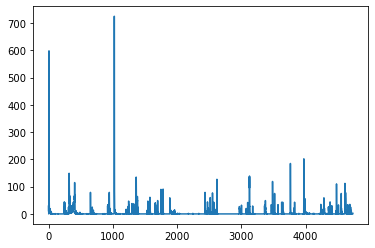

In [23]:
df_posts.reset_index()['index'].plot()

# NLP

In [24]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [25]:
def lemmatization(x):
    if type(x) == spacy.tokens.doc.Doc:
        return [token.lemma_ for token in x if not token.is_stop and token.is_alpha]
    return x

In [26]:
df_posts['body'] = df_posts['body'].apply(lambda x: nlp(x))
df_posts['body_raw'] = df_posts['body']
df_posts['body'] = df_posts['body'].apply(lemmatization)

In [27]:
import emoji
import re

EMOJIS = r"(\:[^ ][a-zA-Z0-9\s\_]*\:)"    

def get_emojis(x):
    res = re.findall(EMOJIS, x)
    return res

def decode_emojis(x):
    decoded = emoji.demojize(str(x))
    decoded = decoded.replace('::', ' ')
    emojis = get_emojis(decoded)
    
    emoji_list = []
    for emo in emojis:
        emo = emo.replace(':', '')
        emo = emo.split(" ")
        
        if type(emo) == list:
            emoji_list.extend(emo)
        else:
            emoji_list.append(emo)
        
    return emoji_list

In [28]:
emojis = df_posts['body_raw'].apply(decode_emojis)
df_posts['body'] += emojis

In [29]:
from collections import Counter
import seaborn as sns

def get_vocab(data, n):
    words = Counter()
    for i in data.index:
        words.update(data.at[i])

    return words.most_common(n)

def show_histogram(word_counts, title=None):
    plot_df = pd.DataFrame.from_dict(word_counts).rename(columns={0:'Token', 1:'Count'})
    
    f, ax = plt.subplots(figsize=(12, 15))
    p = sns.barplot(x="Count", y="Token", data=plot_df, color="b")
    p.set(xlabel="Count", ylabel="", title=title)

In [30]:
df_posts['body'] = df_posts['body'].fillna(value='')
vocab = get_vocab(df_posts['body'].reset_index()['body'], 100)

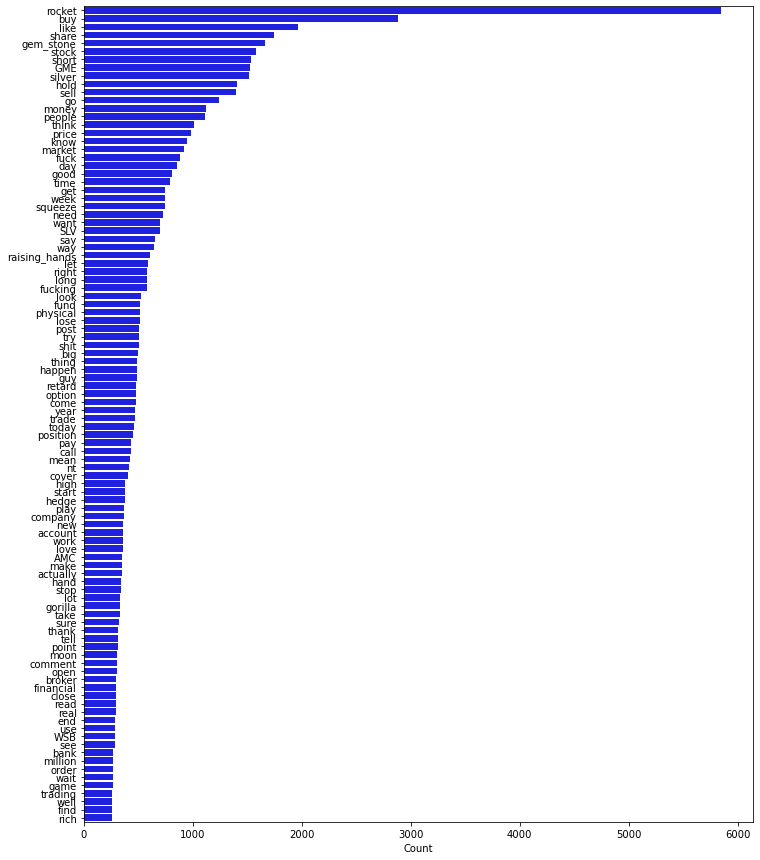

In [31]:
show_histogram(vocab)

In [32]:
def bag_of_words(x, most_freq):
    sent_vec = []
    for token in most_freq:
        if token in x:
            sent_vec.append(x.count(token))
        else:
            sent_vec.append(0)
    return sent_vec

In [33]:
feature_dict = [key for key, _ in vocab]

df_posts['body_bow'] = df_posts['body'].apply(lambda x: bag_of_words(x, feature_dict))

In [34]:
import numpy as np

body_bow = df_posts['body_bow']
body_bow = body_bow.apply(lambda x: np.asarray(x))

body_ind = ['b'+str(x) for x in range(100)]
df_body = pd.DataFrame(body_bow.values.tolist(), columns=body_ind)

df_posts = df_posts.reset_index().join(df_body)

# Features

In [35]:
fuz = body_ind + post_feats + ['post_signal']
X = df_posts[fuz]

In [36]:
num = []
counter = 0
for index, row in X.iterrows():
    if row['post_signal']:
        counter = 0
    num.append(counter)
    counter += 1

In [37]:
X['obs'] = num

<ipython-input-37-e3dddb1a97f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['obs'] = num


In [38]:
X = X.drop(['post_signal'], axis=1)

In [39]:
X

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,title_length,title_capital,body_length,monday,tuesday,wednesday,thursday,friday,image,obs
0,1,0,1,0,0,0,1,0,0,0,...,8,0.173913,149.0,0,0,1,0,0,0,0
1,0,2,4,1,3,3,0,0,0,4,...,8,0.173913,149.0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,8,0.173913,149.0,0,0,1,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,8,0.173913,149.0,0,0,1,0,0,0,3
4,0,4,3,2,0,2,6,1,0,1,...,8,0.173913,149.0,0,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4730,0,0,0,0,0,0,0,0,0,0,...,16,0.105263,0.0,0,0,1,0,0,0,32
4731,0,0,0,0,0,0,0,0,0,0,...,16,0.105263,0.0,0,0,1,0,0,0,33
4732,0,0,0,0,0,0,0,0,0,0,...,16,0.105263,0.0,0,0,1,0,0,0,34
4733,0,0,0,0,0,0,0,0,0,0,...,16,0.105263,0.0,0,0,1,0,0,0,35


In [40]:
y = df_posts['index'].shift(-1).fillna('0')

# Model

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

tensor_train_x = torch.Tensor(X_train)
tensor_train_y = torch.Tensor(y_train)

train_dataset = TensorDataset(tensor_train_x, tensor_train_y)

tensor_x = torch.Tensor(X_test)
tensor_y = torch.Tensor(y_test)

test_dataset = TensorDataset(tensor_x, tensor_y)

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=True)

In [61]:
class Model(nn.Module):
    def __init__(self, in_sz, out_sz, layers, p=0.5):
        super().__init__()
        
        layerlist = []
        
        for i in layers:
            layerlist.append(nn.Linear(in_sz, i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            in_sz = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x):
        x = self.layers(x)
        return x

In [62]:
model = Model(X.shape[1], 1, [1000, 100, 10], p=0.4)

In [63]:
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [64]:
from tqdm.notebook import tqdm

epochs = 100
losses = []

for i in range(epochs):
    batch_loss = 0.0
    for X, y in tqdm(train_dataloader):
        y_pred = model(X)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_loss += loss.item()
    
    if (i+1) % 100 == 0:
        torch.save(model.state_dict(), 'backup/disc2.pth')

    losses.append(batch_loss)
    print(f"Epoch {i+1}, loss: {batch_loss}")


Epoch 1, loss: 3.4073993861675262



Epoch 2, loss: 0.6216913275420666



Epoch 3, loss: 0.2302236589603126



Epoch 4, loss: 0.13617949699983



Epoch 5, loss: 0.11325137969106436



Epoch 6, loss: 0.103062704205513



Epoch 7, loss: 0.11674171080812812



Epoch 8, loss: 0.12520099710673094



Epoch 9, loss: 0.10230351076461375



Epoch 10, loss: 0.10192488366737962



Epoch 11, loss: 0.09843473182991147



Epoch 12, loss: 0.09765157522633672



Epoch 13, loss: 0.10021243849769235



Epoch 14, loss: 0.10589544125832617



Epoch 15, loss: 0.11694085318595171



Epoch 16, loss: 0.10768810845911503



Epoch 17, loss: 0.09916659258306026



Epoch 18, loss: 0.10919464379549026



Epoch 19, loss: 0.10435728216543794



Epoch 20, loss: 0.10618373565375805



Epoch 21, loss: 0.11013891268521547



Epoch 22, loss: 0.1251298754941672



Epoch 23, loss: 0.0971823032014072



Epoch 24, loss: 0.097188217099756



Epoch 25, loss: 0.093163070268929



Epoch 26, loss: 0.09391088294796646



Epoch 27, loss: 0.09418774209916592



Epoch 28, loss: 0.10159261710941792



Epoch 29, loss: 0.1029900349676609



Epoch 30, loss: 0.0967857870273292



Epoch 31, loss: 0.08875011466443539



Epoch 32, loss: 0.08504731254652143



Epoch 33, loss: 0.1055329549126327



Epoch 34, loss: 0.10139822959899902



Epoch 35, loss: 0.09017886850051582



Epoch 36, loss: 0.09864605567418039



Epoch 37, loss: 0.088698570150882



Epoch 38, loss: 0.08460472384467721



Epoch 39, loss: 0.09598706755787134



Epoch 40, loss: 0.09577689645811915



Epoch 41, loss: 0.08238417003303766



Epoch 42, loss: 0.08685603481717408



Epoch 43, loss: 0.08779124147258699



Epoch 44, loss: 0.08036384405568242



Epoch 45, loss: 0.087783585768193



Epoch 46, loss: 0.08542265463620424



Epoch 47, loss: 0.09242833266034722



Epoch 48, loss: 0.08546948991715908



Epoch 49, loss: 0.08565869461745024



Epoch 50, loss: 0.09177351323887706



Epoch 51, loss: 0.0854217167943716



Epoch 52, loss: 0.08237430430017412



Epoch 53, loss: 0.08719621086493134



Epoch 54, loss: 0.08990946505218744



Epoch 55, loss: 0.09610087983310223



Epoch 56, loss: 0.09112607687711716



Epoch 57, loss: 0.08449564641341567



Epoch 58, loss: 0.09704465605318546



Epoch 59, loss: 0.09686103742569685



Epoch 60, loss: 0.08469513850286603



Epoch 61, loss: 0.08232609974220395



Epoch 62, loss: 0.09886969812214375



Epoch 63, loss: 0.08286248706281185



Epoch 64, loss: 0.09298446448519826



Epoch 65, loss: 0.09642780525609851



Epoch 66, loss: 0.08761911699548364



Epoch 67, loss: 0.07339922478422523



Epoch 68, loss: 0.07885646913200617



Epoch 69, loss: 0.07915967865847051



Epoch 70, loss: 0.08343700761906803



Epoch 71, loss: 0.08451023348607123



Epoch 72, loss: 0.08104529418051243



Epoch 73, loss: 0.08816864085383713



Epoch 74, loss: 0.07959083910100162



Epoch 75, loss: 0.07738689286634326



Epoch 76, loss: 0.07825509342364967



Epoch 77, loss: 0.0733685230370611



Epoch 78, loss: 0.0755224353633821



Epoch 79, loss: 0.07748894230462611



Epoch 80, loss: 0.07293606270104647



Epoch 81, loss: 0.08433068986050785



Epoch 82, loss: 0.0758021087385714



Epoch 83, loss: 0.07924998737871647



Epoch 84, loss: 0.07873497484251857



Epoch 85, loss: 0.08317897096276283



Epoch 86, loss: 0.08261503255926073



Epoch 87, loss: 0.08687244448810816



Epoch 88, loss: 0.08480544667690992



Epoch 89, loss: 0.07859639590606093



Epoch 90, loss: 0.0835964058060199



Epoch 91, loss: 0.08550480799749494



Epoch 92, loss: 0.07858154573477805



Epoch 93, loss: 0.07527488260529935



Epoch 94, loss: 0.07555319974198937



Epoch 95, loss: 0.06794387591071427



Epoch 96, loss: 0.07886959961615503



Epoch 97, loss: 0.07689728122204542



Epoch 98, loss: 0.07698822813108563



Epoch 99, loss: 0.07000200159382075



Epoch 100, loss: 0.07060080347582698


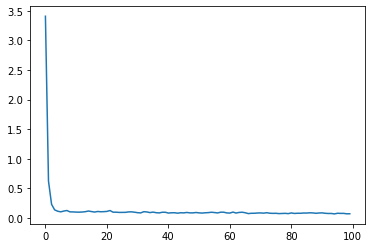

In [65]:
plt.plot(losses)

In [66]:
import numpy as np

model.eval()

with torch.no_grad():
    test_loss = []
    for X, y in tqdm(test_dataloader):
        y_val = model(X)
        loss = criterion(y_val, y)
        test_loss.append(loss.item())
print(f'RMSE: {np.mean(test_loss):.8f}')


RMSE: 0.00359696


In [67]:
ps = df_posts['index']

err = torch.mean(loss) * (ps.max(axis=0) - ps.min(axis=0)) + ps.min(axis=0)

err.item()

2.663525342941284

# Test model

In [68]:
model = Model(X.shape[1], 1, [1000, 100, 10], p=0.4)
criterion = nn.L1Loss()

model.load_state_dict(torch.load('backup/disc2.pth'))
model.eval()

Model(
  (layers): Sequential(
    (0): Linear(in_features=110, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=1000, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=10, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [69]:
import yaml
import praw
from tqdm.notebook import tqdm

with open('backup/reddit-api-data.yml', 'r') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    
reddit = praw.Reddit(
    user_agent="Comment Extraction (by u/USERNAME)",
    client_id=config['id'],
    client_secret=config['secret'],
    username=config['username'],
    password=config['password'],
)

def get_posts(df, n=100, top=False):
    posts = df[(df['comms_num'] > 50) & (df['comms_num'] < 10000)].sample(n)
    pdict = {}
    for i in tqdm(posts.index):
        comm_df = get_comments(i, top)
        pdict[i] = get_comments(i, top)
        
    return pdict

Version 7.2.0 of praw is outdated. Version 7.3.0 was released 10 hours ago.


In [112]:
test_comms = get_posts(df, 4)

In [113]:
test_aggs = []
for key in test_comms.keys():
    test_aggs.append(get_aggregated(test_comms, key, '1H', post_feats))

In [114]:
def preprocess(xdf, feature_dict):
    xdf['body'] = xdf['body'].apply(lambda x: nlp(x))
    xdf['body_raw'] = xdf['body']
    xdf['body'] = xdf['body'].apply(lemmatization)
    emojis = xdf['body_raw'].apply(decode_emojis)
    xdf['body'] += emojis
    xdf['body_bow'] = xdf['body'].apply(lambda x: bag_of_words(x, feature_dict))
    
    body_bow = xdf['body_bow']
    body_bow = body_bow.apply(lambda x: np.asarray(x))

    body_ind = ['b'+str(x) for x in range(100)]
    df_body = pd.DataFrame(body_bow.values.tolist(), columns=body_ind)

    xdf = xdf.reset_index().join(df_body)
    
    return xdf

In [115]:
for idx, xdf in enumerate(test_aggs):
    test_aggs[idx] = preprocess(xdf, feature_dict)

In [116]:
fuz = body_ind + post_feats + ['obs']

y_test = []
X_test = []
for idx, xdf in enumerate(test_aggs):
    y_test.append(xdf['index'])
    uwu = xdf.reset_index().rename(columns={'level_0': 'obs'})
    X_test.append(uwu[fuz])

In [117]:
def rescale(val):
    return val * (df_posts['index'].max(axis=0) - df_posts['index'].min(axis=0)) + df_posts['index'].min(axis=0)

RMSE:  5.821056365966797


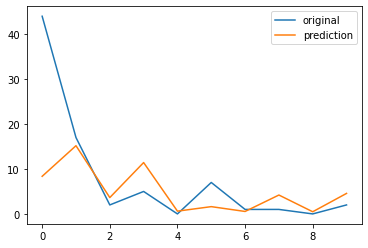

RMSE:  1.5970579385757446


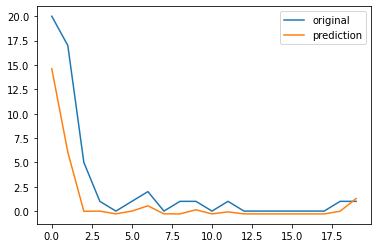

RMSE:  1.7867058515548706


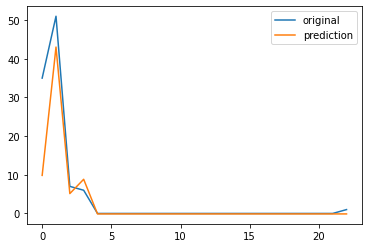

RMSE:  6.042515277862549


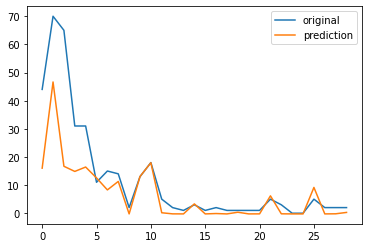

In [118]:
preds = []
for X, y in zip(X_test, y_test):
    X = scaler.transform(X.values)
    y = scaler_y.transform(y.values.reshape(-1, 1))
    
    tensor_x = torch.Tensor(X)
    tensor_y = torch.Tensor(y)
    
    model.eval()
    with torch.no_grad():
        y_val = model(tensor_x)
        
    y = rescale(tensor_y)
    y_val = rescale(y_val)

    print("RMSE: ", criterion(y_val, y).item())
    plt.figure()
    plt.plot(y, label='original')
    plt.plot(y_val, label='prediction')
    plt.legend()
    plt.show()

# LSTM

In [75]:
import pickle

def get_posts_even(df):
    posts_low = df[(df['comms_num'] > 50) & (df['comms_num'] < 300)].sample(70)
    posts_mid = df[(df['comms_num'] > 300) & (df['comms_num'] < 500)].sample(50)
    posts_high = df[(df['comms_num'] > 500) & (df['comms_num'] < 10000)].sample(20)
    posts = pd.concat([posts_low, posts_mid, posts_high])
    pdict = {}
    for i in tqdm(posts.index):
        pdict[i] = get_comments(i)
        
    return pdict

lstm_comms = get_posts_even(df)

with open('backup/lstmcomments.pickle', 'wb') as handle:
    pickle.dump(lstm_comms, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
import pickle

with open('backup/comments.pickle', 'rb') as handle:
    lstm_comms = pickle.load(handle)

In [21]:
import numpy as np

post_feats = ['title_length', 'title_capital', 'body_length', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'image']
body_ind = ['b'+str(x) for x in range(100)]

def preprocess(xdf):
    xdf['body'] = xdf['body'].apply(lambda x: nlp(x))
    xdf['body_raw'] = xdf['body']
    xdf['body'] = xdf['body'].apply(lemmatization)
    emojis = xdf['body_raw'].apply(decode_emojis)
    xdf['body'] += emojis
    
    return xdf

def get_bow(xdf, feature_dict):
    xdf['body_bow'] = xdf['body'].apply(lambda x: bag_of_words(x, feature_dict))
    
    body_bow = xdf['body_bow']
    body_bow = body_bow.apply(lambda x: np.asarray(x))

    body_ind = ['b'+str(x) for x in range(100)]
    df_body = pd.DataFrame(body_bow.values.tolist(), columns=body_ind)

    xdf = xdf.reset_index().join(df_body)
    
    return xdf

def get_sequences(df, target, keys, seq_length):
    seq = []
    tar = []
    corr_post = []
    for key in keys:
        post = df[df['post_id'] == key]
        post_tar = target[target['post_id'] == key]['target'].reset_index(drop=True)
        size = len(post) - (len(post) % seq_length)
        
        if size > 0:
            bow_feats = ['b'+str(x) for x in range(100)] + ['index']
            bow = post[bow_feats]
            post_info = post[post_feats].iloc[0, :]

            for i in range(size-seq_length):
                seq.append(bow.iloc[i:i+seq_length, :].values)
                tar.append(post_tar[i+seq_length])
                corr_post.append(post_info.values)

    return seq, corr_post, tar

In [104]:
aggs = []
for key in lstm_comms.keys():
    aggs.append(get_aggregated(lstm_comms, key, '30min', post_feats))

df_lstm = pd.concat(aggs)
preprocessed_df = preprocess(df_lstm)
vocab_lstm = get_vocab(df_lstm['body'].reset_index()['body'], 100)
feature_dict_lstm = [key for key, _ in vocab_lstm]
df_lstm = get_bow(df_lstm, feature_dict_lstm)

In [206]:
from sklearn.preprocessing import MinMaxScaler
import random

fuz = body_ind + post_feats + ['index']

scaler = MinMaxScaler()
scaler_y = MinMaxScaler()

test_keys = random.sample(lstm_comms.keys(), 10)
train_keys = [key for key in lstm_comms.keys() if key not in test_keys]
train = df_lstm[df_lstm['post_id'].isin(train_keys)]
train_y = train['index']
train_ids = train['post_id']
train = train[fuz]

test = df_lstm[df_lstm['post_id'].isin(test_keys)]
test_y = test['index']
test_ids = test['post_id']
test = test[fuz]

X_train = pd.DataFrame(scaler.fit_transform(train), columns=fuz)
X_train['post_id'] = train_ids
X_test = pd.DataFrame(scaler.transform(test), columns=fuz)
X_test['post_id'] = test_ids

y_train = pd.DataFrame(scaler_y.fit_transform(train_y.values.reshape(-1, 1)), columns=['target'])
y_train['post_id'] = train_ids
y_test = pd.DataFrame(scaler_y.transform(test_y.values.reshape(-1, 1)), columns=['target'])
y_test['post_id'] = test_ids

in_seq, in_post, out_seq = get_sequences(X_train, y_train, train_keys, 2)

In [207]:
len(in_seq)

7234

In [208]:
test_seq, test_post, test_out = get_sequences(X_test, y_test, test_keys, 2)
test_inout_seq = (torch.tensor(test_seq).float(), torch.tensor(test_post).float(), torch.tensor(test_out).float())
test_inout_seq[2]

tensor([0.0534, 0.0636, 0.0204, 0.0127, 0.0254, 0.0025, 0.0025, 0.0051, 0.0000,
        0.0153, 0.0025, 0.0051, 0.0025, 0.0178, 0.0025, 0.0000, 0.0051, 0.0153,
        0.0000, 0.0254, 0.0076, 0.0000, 0.0051, 0.0076, 0.0076, 0.0000, 0.0025,
        0.0051, 0.0076, 0.0025, 0.0051, 0.0051, 0.0000, 0.0051, 0.0025, 0.0025,
        0.0000, 0.0025, 0.0025, 0.0000, 0.0000, 0.0025, 0.0025, 0.0025, 0.0000,
        0.0127, 0.0000, 0.0000])

In [209]:
w = torch.tensor(in_seq)

In [210]:
w.shape

torch.Size([7234, 2, 101])

In [211]:
s = torch.tensor(in_post)
s.shape

torch.Size([7234, 9])

In [215]:
class LSTM(nn.Module):
    def __init__(self, bow_size=101, post_size=9, hidden_layer_size=300, batch_size=2, num_layers=2, output_size=100):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(bow_size, hidden_layer_size, num_layers=num_layers, dropout=0.3)

        self.linear = nn.Linear(hidden_layer_size*batch_size, output_size)
        
        self.activation = nn.LeakyReLU(inplace=True)
        
        self.post_net = nn.Sequential(
            nn.Linear(output_size+post_size, 100),
            self.activation,
            nn.Linear(100, 20),
            self.activation,
            nn.Linear(20, 1)
        )

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_bow, input_post):
        lstm_out, self.hidden_cell = self.lstm(input_bow, self.hidden_cell)
        lstm_out = self.activation(lstm_out)
        ints = self.linear(lstm_out.view(len(input_bow), -1))
        ints = self.activation(ints)
        ints_post = torch.cat((ints, input_post), dim=1)
        prediction = self.post_net(ints_post)
        return prediction

In [216]:
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

In [217]:
print(model)

LSTM(
  (lstm): LSTM(101, 300, num_layers=2, dropout=0.3)
  (linear): Linear(in_features=600, out_features=100, bias=True)
  (activation): LeakyReLU(negative_slope=0.01, inplace=True)
  (post_net): Sequential(
    (0): Linear(in_features=109, out_features=100, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=100, out_features=20, bias=True)
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [218]:
train_inout_seq = (torch.tensor(in_seq).float(), torch.tensor(in_post).float(), torch.tensor(out_seq).float())

In [220]:
from tqdm.notebook import tqdm

epochs = 50
losses = []

for i in tqdm(range(epochs)):
    seq, post, out = train_inout_seq
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(2, 2, model.hidden_layer_size, dtype=torch.float),
                    torch.zeros(2, 2, model.hidden_layer_size, dtype=torch.float))

    y_pred = model(seq, post)
    loss = criterion(rescale_minmax(y_pred), rescale_minmax(out))
    losses.append(loss)
    loss.backward()
    optimizer.step()
        
    if i%10 == 0:
        print(f'Epoch: {i:3} loss: {loss.item():10.8f}')

D:\anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([7234])) that is different to the input size (torch.Size([7234, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:   0 loss: 806.21514893
Epoch:  10 loss: 170.10676575
Epoch:  20 loss: 162.23254395
Epoch:  30 loss: 160.56987000
Epoch:  40 loss: 160.34460449



KeyboardInterrupt: 

In [221]:
torch.save(model.state_dict(), 'backup/lstm_model_olddata_5_mse3.pth')

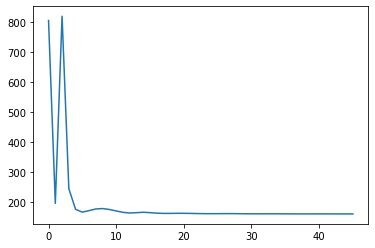

In [222]:
import matplotlib.pyplot as plt

plt.plot(losses)

# Test LSTM model

In [ ]:
model = LSTM()
criterion = nn.MSELoss()

model.load_state_dict(torch.load('backup/lstm_model_olddata_5_mse3.pth'))
model.eval()

In [223]:
test_seq, test_post, test_out = get_sequences(X_test, y_test, test_keys, 2)

In [224]:
test_inout_seq = (torch.tensor(test_seq).float(), torch.tensor(test_post).float(), torch.tensor(test_out).float())

In [225]:
test_inout_seq[2]

tensor([0.0534, 0.0636, 0.0204, 0.0127, 0.0254, 0.0025, 0.0025, 0.0051, 0.0000,
        0.0153, 0.0025, 0.0051, 0.0025, 0.0178, 0.0025, 0.0000, 0.0051, 0.0153,
        0.0000, 0.0254, 0.0076, 0.0000, 0.0051, 0.0076, 0.0076, 0.0000, 0.0025,
        0.0051, 0.0076, 0.0025, 0.0051, 0.0051, 0.0000, 0.0051, 0.0025, 0.0025,
        0.0000, 0.0025, 0.0025, 0.0000, 0.0000, 0.0025, 0.0025, 0.0025, 0.0000,
        0.0127, 0.0000, 0.0000])

In [226]:
u = np.mean(train_y.values)
s = np.std(train_y.values)
mx = np.max(train_y.values)
mn = np.min(train_y.values)

def rescale_std(x):
    return x*s + u

def rescale_minmax(x):
    return x * (mx - mn) + mn

D:\anaconda3\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RMSE:  0.00017969009059015661


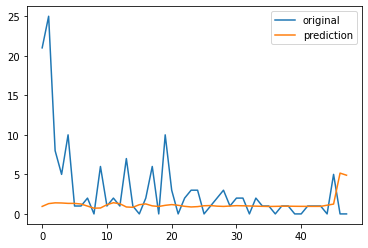

In [227]:
model.eval()

with torch.no_grad():
    y_pred = model(test_inout_seq[0], test_inout_seq[1])
    
print("RMSE: ", criterion(y_pred, test_inout_seq[2]).item())
plt.figure()
plt.plot(rescale_minmax(test_inout_seq[2]), label='original')
plt.plot(rescale_minmax(y_pred), label='prediction')
plt.legend()
plt.show()

# ARIMA

In [41]:
df_posts['post_signal'][0] = True

<ipython-input-41-a505621e0502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_posts['post_signal'][0] = True


In [42]:
dates = df_posts[df_posts['post_signal'] == True][['date', 'post_id']].copy()

dates.sort_values('date')

,date,post_id
4698,2021-01-20 03:00:00,l10axx
3174,2021-01-20 04:00:00,l121r4
696,2021-01-20 20:00:00,l1hw75
1959,2021-01-21 04:00:00,l1qtmg
3103,2021-01-21 14:00:00,l1zqvz
...,...,...
276,2021-02-09 05:00:00,lfv9ah
2967,2021-02-09 14:00:00,lg3zf4
252,2021-02-09 17:00:00,lg8b7a
1296,2021-02-09 18:00:00,lg9ktu


In [43]:
df_sorted = df_posts.sort_values(by=['post_id', 'date']).reset_index(drop=True)

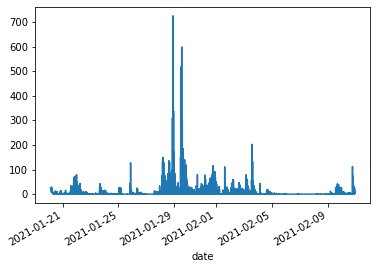

In [44]:
df_sorted.set_index('date')['index'].plot()

In [45]:
comms = df_sorted['index']
df_sorted['post_id'].value_counts()[:10]

l1qtmg    474
l4xcij    349
l6novm    332
l833dg    247
l7q26x    235
l1hw75    223
l121r4    186
l78duc    186
l77wpb    146
lc6xn8    143
Name: post_id, dtype: int64

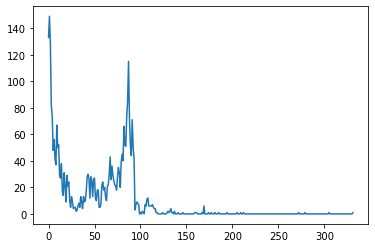

In [56]:
comms = df_sorted[df_sorted['post_id'] == 'l6novm']['index']
comms = comms.reset_index(drop=True)
comms.plot()

In [76]:
comms = df_sorted['index']
comms = comms.reset_index(drop=True)

# ARIMA

In [77]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(comms)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -26.751301
p-value: 0.000000


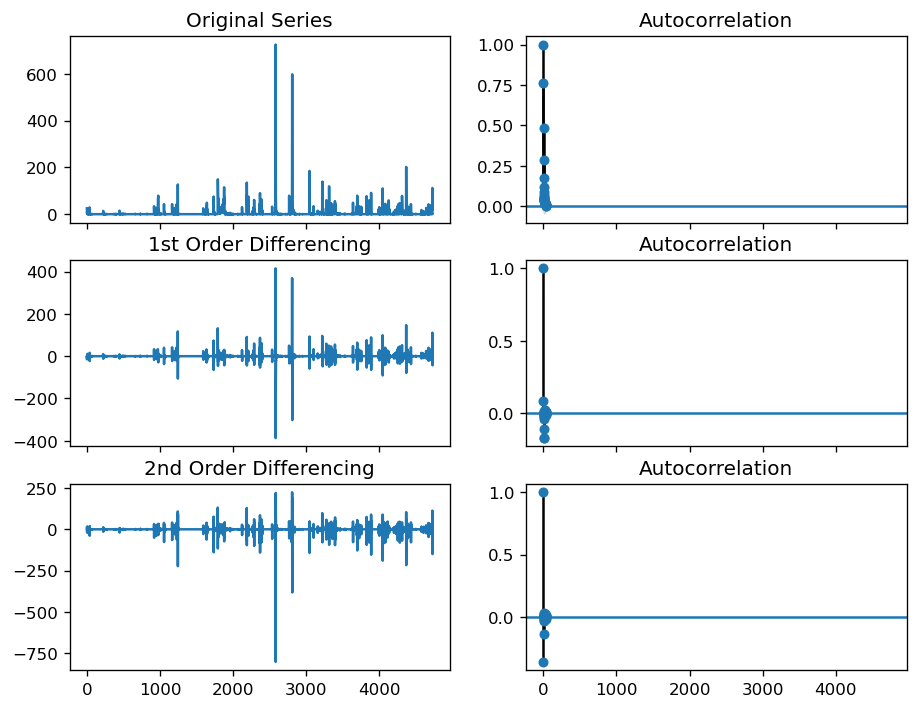

In [78]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(comms); axes[0, 0].set_title('Original Series')
plot_acf(comms, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(comms.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(comms.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(comms.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(comms.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

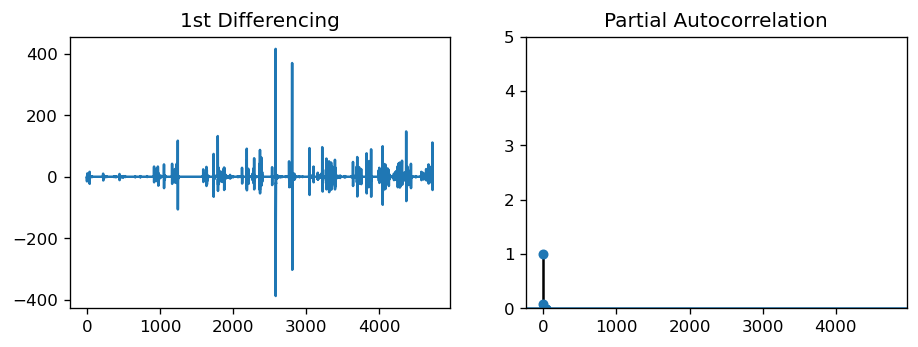

In [79]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(comms.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(comms.diff().dropna(), ax=axes[1])

plt.show()

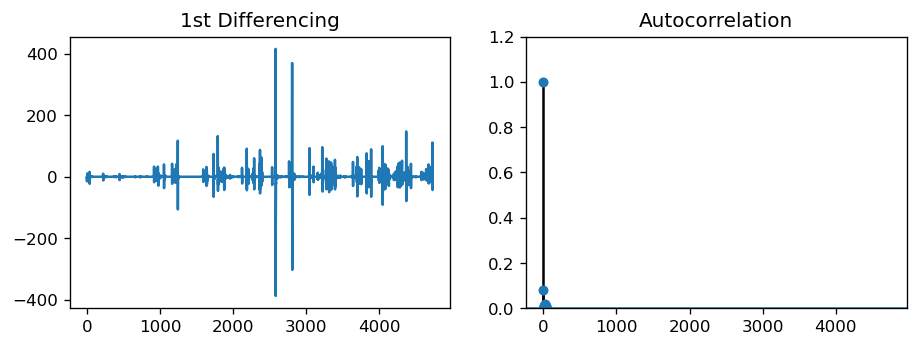

In [80]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(comms.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(comms.diff().dropna(), ax=axes[1])

plt.show()

In [81]:
from statsmodels.tsa.arima_model import ARIMA

In [86]:
model = ARIMA(comms, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.index   No. Observations:                 4734
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19310.383
Method:                       css-mle   S.D. of innovations             14.289
Date:                Mon, 21 Jun 2021   AIC                          38628.765
Time:                        12:55:55   BIC                          38654.615
Sample:                             1   HQIC                         38637.850
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.001      1.548      0.122      -0.000       0.002
ar.L1.D.index     0.7597      0.009     80.277      0.000       0.741       0.778
ma.L1.D.index    -1.0000      0.001  -11

In [89]:
model = ARIMA(comms, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.index   No. Observations:                 4734
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -19189.763
Method:                       css-mle   S.D. of innovations             13.929
Date:                Mon, 21 Jun 2021   AIC                          38389.526
Time:                        12:57:20   BIC                          38421.839
Sample:                             1   HQIC                         38400.883
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.001      1.814      0.070    -7.9e-05       0.002
ar.L1.D.index     0.6487      0.014     46.914      0.000       0.622       0.676
ma.L1.D.index    -0.7206      0.017    -

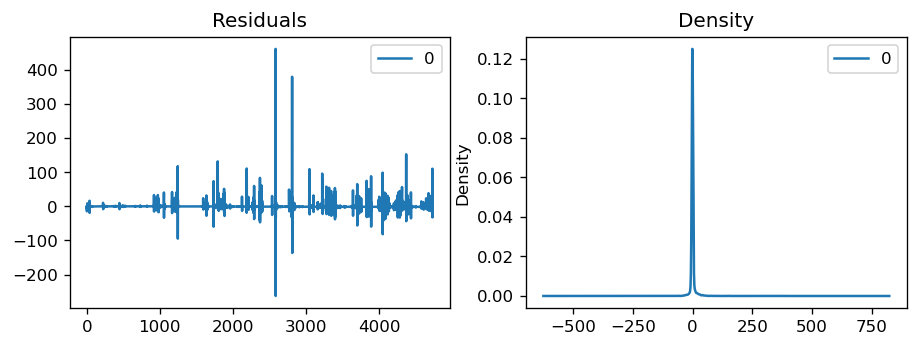

In [90]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

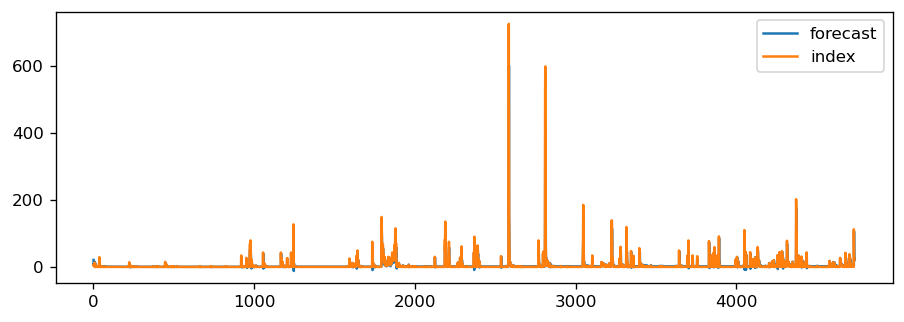

In [91]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [92]:
from statsmodels.tsa.stattools import acf


# Create Training and Test
train = comms[:4000]
test = comms[4000:]

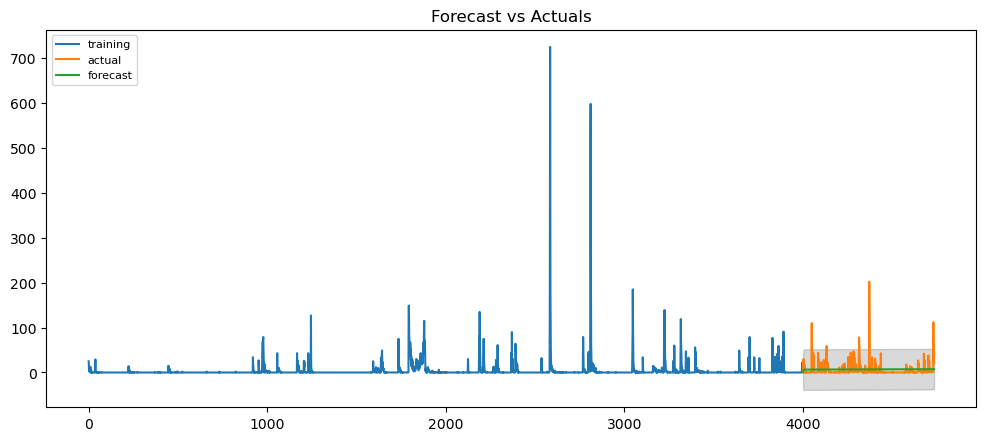

In [103]:
# Build Model 
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(735, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [104]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

<ipython-input-104-41be5724d783>:3: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
<ipython-input-104-41be5724d783>:6: RuntimeWarning: divide by zero encountered in true_divide
  mpe = np.mean((forecast - actual)/actual)   # MPE
D:\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': inf,
 'me': 1.5243953561509598,
 'mae': 8.276281971635884,
 'mpe': inf,
 'rmse': 14.50450232619779,
 'acf1': 0.6075084548724295,
 'corr': -0.010597370753132529,
 'minmax': 0.8112134007785214}